# Multi-Layer Perceptron (MLP) Classifier
This notebook demonstrates the implementation of MLP classifiers for binary and multi-class classification using the MNIST dataset.

## Load and Explore the MNIST Dataset
We begin by loading the MNIST dataset and exploring its structure.

In [1]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

2025-04-06 06:37:49.210033: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-06 06:37:49.708841: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-06 06:37:50.064976: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-06 06:37:50.489061: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-06 06:37:50.589256: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-06 06:37:51.323577: I tensorflow/core/platform/cpu_feature_gu

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# print(x_test)
print(y_test)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


## Visualize Sample Images
Display a grid of random images from the training dataset to understand the data visually.

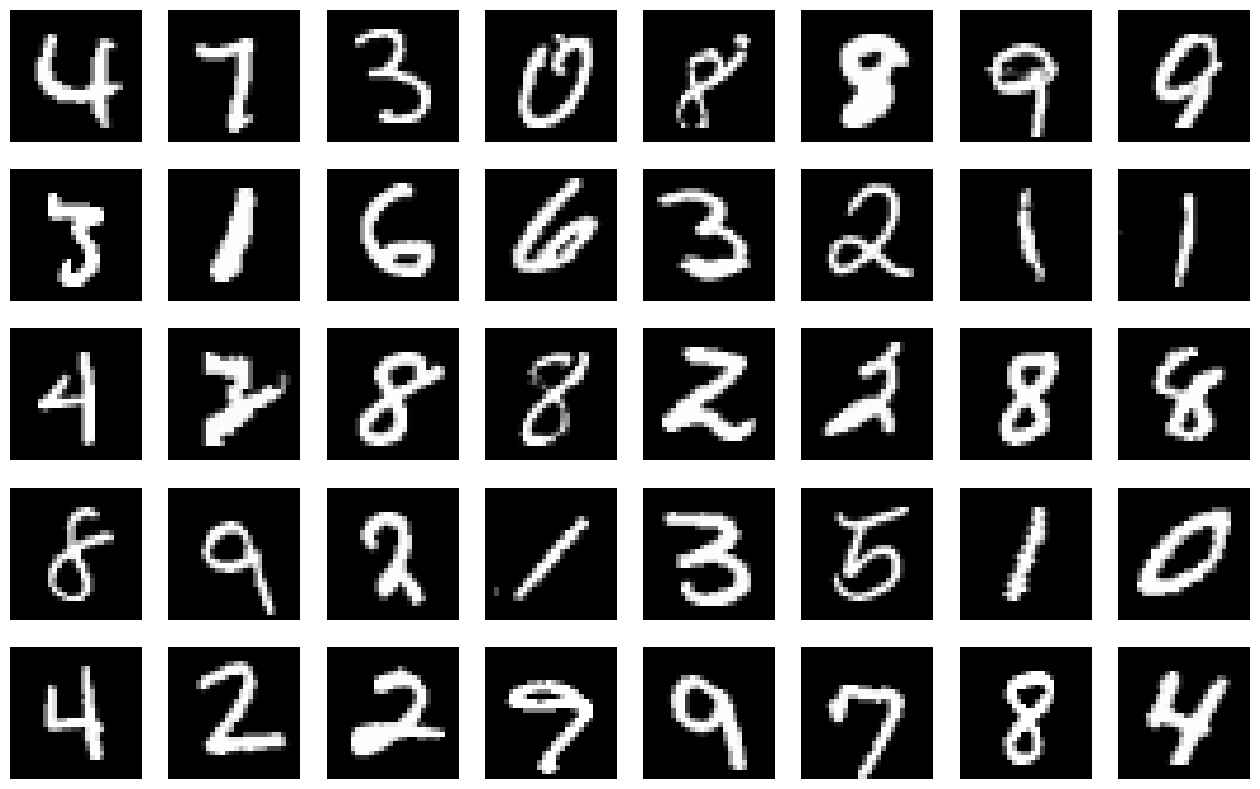

In [5]:
import matplotlib.pyplot as plt
from random import randrange

plt.figure(figsize=(16,10),facecolor='w')
for i in range(5):
  for j in range(8):
    index=randrange(0,60000)
    plt.subplot(5,8,i*8+j+1)
    plt.imshow(x_train[index],plt.cm.gray)
    plt.axis('off')
plt.show()

## Preprocess the Data
Flatten the images and normalize the pixel values to prepare the data for training.

In [6]:
print('長寬這二維圖像轉換為一維數值，MLP才能進行處理')
x_train=x_train.reshape(60000,784)
x_train=x_train/255
x_test=x_test.reshape(10000,784)
x_test=x_test/255

長寬這二維圖像轉換為一維數值，MLP才能進行處理


## Convert Labels to One-Hot Encoding
Transform the labels into one-hot encoded vectors for compatibility with the MLP model.

In [7]:
from tensorflow.keras.utils import to_categorical
# 轉 one-hot encoding
y_train=to_categorical(y_train,10)
print(y_test)
y_test=to_categorical(y_test,10)
print(y_test)

[7 2 1 ... 4 5 6]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Build and Compile the Models
Create two MLP models: one for binary classification and another for multi-class classification.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Dense

print('產生兩個模型')
model1=Sequential()
model2=Sequential()
print('加入輸入層')
model1.add(InputLayer(input_shape=(784,)))
model2.add(InputLayer(input_shape=(784,)))
print('加入一個隱藏層')
model1.add(Dense(units=64,activation='relu'))
model2.add(Dense(units=64,activation='relu'))
print('多加入一個隱藏層')
model1.add(Dense(units=64,activation='relu'))
model2.add(Dense(units=64,activation='relu'))
print('設定輸出層與編譯，二分法部分')
model1.add(Dense(units=10,activation='sigmoid'))
model1.summary()
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print('設定輸出層與編譯，多分類部分')
model2.add(Dense(units=10,activation='softmax'))
model2.summary()
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

產生兩個模型
加入輸入層
加入一個隱藏層
多加入一個隱藏層
設定輸出層與編譯，二分法部分


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

設定輸出層與編譯，多分類部分


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train and Validate the Binary Classification Model
Train the binary classification model and visualize its performance metrics.

針對二分法進行訓練與驗證
Epoch 1/20


2025-04-06 06:48:02.323062: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


1688/1688 - 3s - 2ms/step - accuracy: 0.8978 - loss: 0.0670 - val_accuracy: 0.9598 - val_loss: 0.0285
Epoch 2/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9570 - loss: 0.0282 - val_accuracy: 0.9692 - val_loss: 0.0212
Epoch 3/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9704 - loss: 0.0199 - val_accuracy: 0.9740 - val_loss: 0.0173
Epoch 4/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9759 - loss: 0.0159 - val_accuracy: 0.9760 - val_loss: 0.0160
Epoch 5/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9805 - loss: 0.0132 - val_accuracy: 0.9782 - val_loss: 0.0157
Epoch 6/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9842 - loss: 0.0110 - val_accuracy: 0.9780 - val_loss: 0.0146
Epoch 7/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9868 - loss: 0.0094 - val_accuracy: 0.9780 - val_loss: 0.0152
Epoch 8/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9888 - loss: 0.0081 - val_accuracy: 0.9788 - val_loss: 0.0157
Epoch 9/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9901 - loss: 0.0072 - val_accuracy: 0.9808 - val_loss: 0

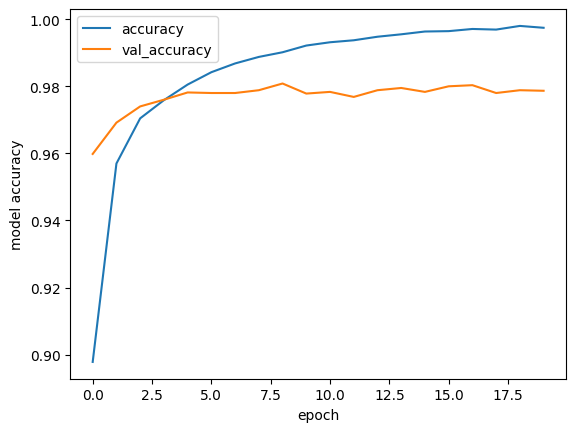

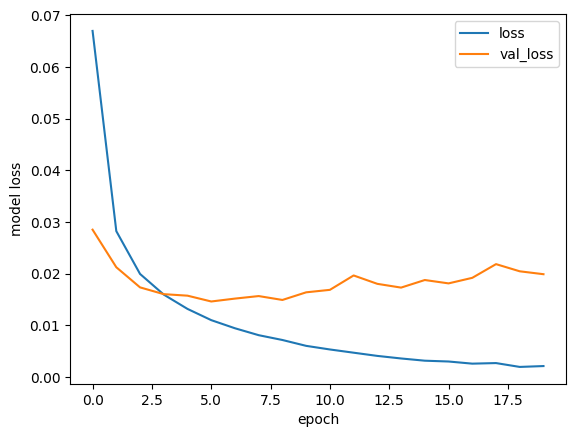

In [9]:
print('針對二分法進行訓練與驗證')
history=model1.fit(x=x_train,y=y_train,epochs=20,batch_size=32,validation_split=0.1,verbose=2)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Train and Validate the Multi-Class Classification Model
Train the multi-class classification model and visualize its performance metrics.

針對多分類進行訓練與驗證
60000
Epoch 1/20


2025-04-06 06:51:58.557952: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


1688/1688 - 3s - 2ms/step - accuracy: 0.9125 - loss: 0.2987 - val_accuracy: 0.9602 - val_loss: 0.1348
Epoch 2/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9586 - loss: 0.1367 - val_accuracy: 0.9683 - val_loss: 0.1015
Epoch 3/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9702 - loss: 0.0971 - val_accuracy: 0.9740 - val_loss: 0.0882
Epoch 4/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9760 - loss: 0.0755 - val_accuracy: 0.9753 - val_loss: 0.0890
Epoch 5/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9805 - loss: 0.0617 - val_accuracy: 0.9730 - val_loss: 0.0883
Epoch 6/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9836 - loss: 0.0517 - val_accuracy: 0.9765 - val_loss: 0.0743
Epoch 7/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9858 - loss: 0.0430 - val_accuracy: 0.9808 - val_loss: 0.0659
Epoch 8/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9881 - loss: 0.0380 - val_accuracy: 0.9793 - val_loss: 0.0733
Epoch 9/20
1688/1688 - 3s - 2ms/step - accuracy: 0.9891 - loss: 0.0320 - val_accuracy: 0.9793 - val_loss: 0

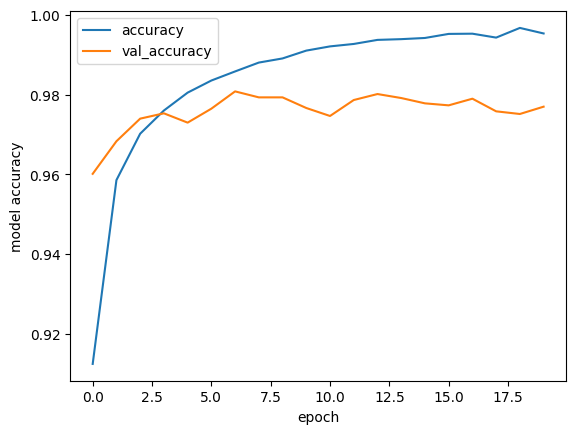

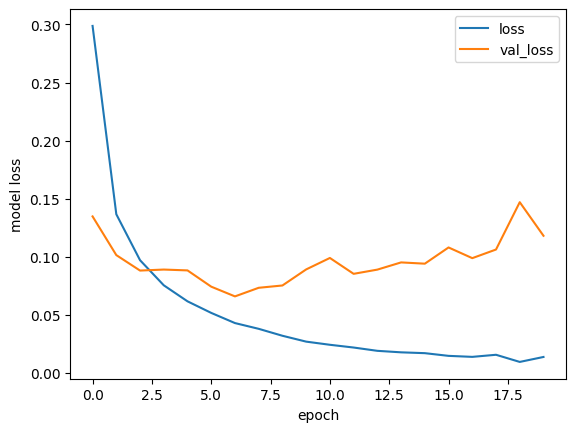

In [10]:
print('針對多分類進行訓練與驗證')
print(len(x_train))
history=model2.fit(x=x_train,y=y_train,epochs=20,batch_size=32,validation_split=0.1,verbose=2)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Early Stopping for Binary Classification
Implement early stopping to improve training efficiency for the binary classification model.

針對二分法進行訓練與驗證，增加訓練調回的設定
Epoch 1/20


2025-04-06 06:56:40.557857: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


1688/1688 - 2s - 1ms/step - accuracy: 0.9981 - loss: 0.0018 - val_accuracy: 0.9797 - val_loss: 0.0196
Epoch 2/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9979 - loss: 0.0020 - val_accuracy: 0.9782 - val_loss: 0.0213
Epoch 3/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9982 - loss: 0.0017 - val_accuracy: 0.9800 - val_loss: 0.0221
Epoch 4/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9986 - loss: 0.0013 - val_accuracy: 0.9768 - val_loss: 0.0235
Epoch 5/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9982 - loss: 0.0017 - val_accuracy: 0.9782 - val_loss: 0.0228
Epoch 6/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9986 - loss: 0.0014 - val_accuracy: 0.9788 - val_loss: 0.0236
Epoch 7/20
1688/1688 - 2s - 1ms/step - accuracy: 0.9988 - loss: 0.0013 - val_accuracy: 0.9793 - val_loss: 0.0237


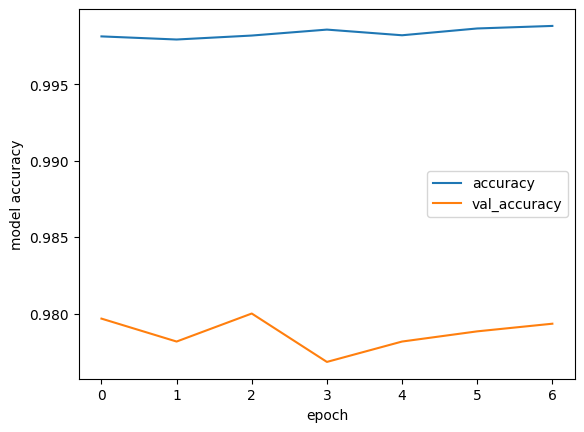

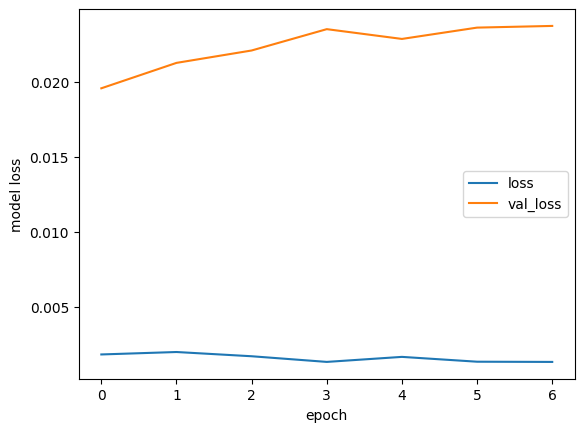

In [11]:
print('針對二分法進行訓練與驗證，增加訓練調回的設定')
import tensorflow as tf
my_callbacks=[
 tf.keras.callbacks.EarlyStopping(patience=4,monitor='val_accuracy')
]
history=model1.fit(
    x=x_train,y=y_train,epochs=20,batch_size=32,
    validation_split=0.1,verbose=2,callbacks=my_callbacks)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Early Stopping for Multi-Class Classification
Implement early stopping to improve training efficiency for the multi-class classification model.

針對多分類進行訓練與驗證，增加訓練調回的設定
Epoch 1/20
1688/1688 - 6s - loss: 0.0864 - accuracy: 0.9750 - val_loss: 0.1079 - val_accuracy: 0.9683 - 6s/epoch - 4ms/step
Epoch 2/20
1688/1688 - 5s - loss: 0.0855 - accuracy: 0.9759 - val_loss: 0.1093 - val_accuracy: 0.9690 - 5s/epoch - 3ms/step
Epoch 3/20
1688/1688 - 7s - loss: 0.0848 - accuracy: 0.9757 - val_loss: 0.1096 - val_accuracy: 0.9693 - 7s/epoch - 4ms/step
Epoch 4/20
1688/1688 - 5s - loss: 0.0841 - accuracy: 0.9757 - val_loss: 0.1096 - val_accuracy: 0.9693 - 5s/epoch - 3ms/step
Epoch 5/20
1688/1688 - 5s - loss: 0.0836 - accuracy: 0.9756 - val_loss: 0.1084 - val_accuracy: 0.9692 - 5s/epoch - 3ms/step
Epoch 6/20
1688/1688 - 5s - loss: 0.0831 - accuracy: 0.9758 - val_loss: 0.1093 - val_accuracy: 0.9695 - 5s/epoch - 3ms/step
Epoch 7/20
1688/1688 - 4s - loss: 0.0822 - accuracy: 0.9764 - val_loss: 0.1069 - val_accuracy: 0.9688 - 4s/epoch - 3ms/step
Epoch 8/20
1688/1688 - 5s - loss: 0.0817 - accuracy: 0.9764 - val_loss: 0.1075 - val_accuracy: 0.9698 - 5s/ep

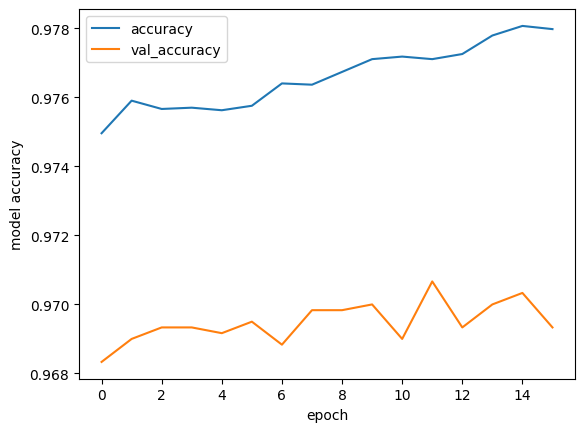

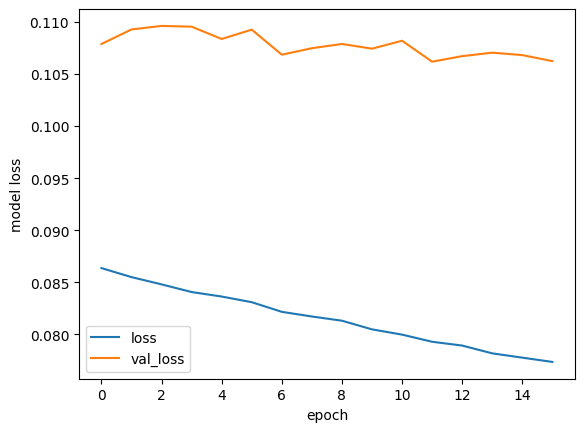

In [ ]:
print('針對多分類進行訓練與驗證，增加訓練調回的設定')
import tensorflow as tf
my_callbacks=[
 tf.keras.callbacks.EarlyStopping(patience=4,monitor='val_accuracy')
]
history=model2.fit(
    x=x_train,y=y_train,epochs=20,batch_size=32,
    validation_split=0.1,verbose=2,callbacks=my_callbacks)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend()
plt.show()